In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from annomalydetector.core import detect_anomalies_with_lstm_autoencoder, detect_anomalies_with_moving_avg_std

In [3]:
df = pd.read_csv('../data/pose/data/red_0712_0016/position_data.csv')
df.head()

,frame,NOSE_x,NOSE_y,LEFT_EYE_x,LEFT_EYE_y,RIGHT_EYE_x,RIGHT_EYE_y,LEFT_EAR_x,LEFT_EAR_y,RIGHT_EAR_x,RIGHT_EAR_y,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,RIGHT_WRIST_x,RIGHT_WRIST_y,LEFT_HIP_x,LEFT_HIP_y,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
0,1.0,0.525896,0.481060,0.533007,0.476425,0.520267,0.476250,0.549978,0.473106,0.514237,0.473486,0.574621,0.490921,0.508924,0.492315,0.565651,0.525961,0.519313,0.528249,0.550516,0.562890,0.537876,0.564187,0.570264,0.545634,0.517687,0.545264,0.586227,0.605650,0.494826,0.604416,0.600308,0.660938,0.474044,0.660994
1,2.0,0.526112,0.481253,0.533294,0.476504,0.520324,0.476309,0.550234,0.472901,0.514087,0.473230,0.574690,0.490460,0.508386,0.491814,0.565407,0.525673,0.518882,0.527435,0.550531,0.562624,0.538058,0.563823,0.569624,0.543918,0.516669,0.543678,0.586075,0.604220,0.493446,0.603968,0.599726,0.659370,0.474218,0.660525
2,3.0,0.528718,0.481789,0.535814,0.476960,0.522186,0.476923,0.551112,0.472861,0.514215,0.473469,0.574298,0.490493,0.507566,0.492131,0.565561,0.525533,0.519138,0.527878,0.550223,0.562646,0.538177,0.563889,0.569863,0.545131,0.516825,0.544978,0.585712,0.605053,0.493604,0.604372,0.599659,0.659941,0.474338,0.660232
3,4.0,0.527719,0.482043,0.535006,0.477198,0.521416,0.477034,0.550825,0.472898,0.513844,0.473216,0.574231,0.490183,0.507561,0.491554,0.564835,0.525836,0.519638,0.527859,0.549039,0.562611,0.537384,0.563772,0.570423,0.543756,0.517343,0.543495,0.585746,0.604340,0.494227,0.603521,0.599861,0.659887,0.474178,0.660410
4,5.0,0.529105,0.481354,0.536542,0.476461,0.522361,0.476353,0.551760,0.472708,0.513761,0.473082,0.573349,0.490495,0.507301,0.491712,0.563395,0.525755,0.519150,0.527227,0.549091,0.562397,0.538259,0.563136,0.570029,0.543454,0.517551,0.543261,0.584844,0.603028,0.494418,0.602611,0.599403,0.659056,0.474290,0.659381


In [4]:
data = df[['RIGHT_KNEE_x', 'RIGHT_KNEE_y', 'LEFT_KNEE_x', 'LEFT_KNEE_y']].values
anomaly_indices, reconstruction_errors = detect_anomalies_with_lstm_autoencoder(data, verbose=True)

Epoch [20/200], Loss: 0.2604
Epoch [40/200], Loss: 0.1302
Epoch [60/200], Loss: 0.0210
Epoch [80/200], Loss: 0.0119
Epoch [100/200], Loss: 0.0081
Epoch [120/200], Loss: 0.0063
Epoch [140/200], Loss: 0.0053
Epoch [160/200], Loss: 0.0047
Epoch [180/200], Loss: 0.0042
Epoch [200/200], Loss: 0.0038


In [5]:
print(f'anomaly_indices: {anomaly_indices}')

anomaly_indices: [296 298 299 300 301 302 303 304 307 308 309 311 312 590 591 592 593 594
 595 596 597 598 599 600 601 602 603 604 605 606 607]


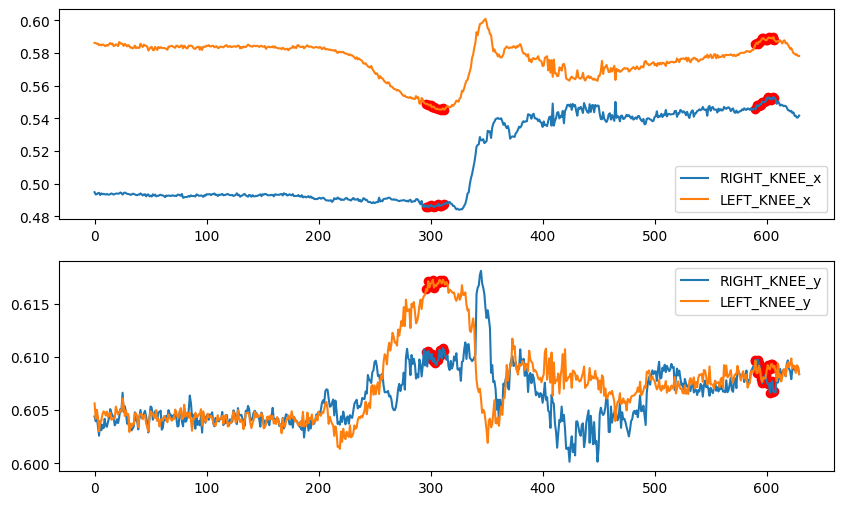

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(df.index, df['RIGHT_KNEE_x'], label='RIGHT_KNEE_x')
ax[0].scatter(df.iloc[anomaly_indices].index, df['RIGHT_KNEE_x'].iloc[anomaly_indices], c='r')
ax[0].plot(df.index, df['LEFT_KNEE_x'], label='LEFT_KNEE_x')
ax[0].scatter(df.iloc[anomaly_indices].index, df['LEFT_KNEE_x'].iloc[anomaly_indices], c='r')
ax[0].legend()

ax[1].plot(df.index, df['RIGHT_KNEE_y'], label='RIGHT_KNEE_y')
ax[1].scatter(df.iloc[anomaly_indices].index, df['RIGHT_KNEE_y'].iloc[anomaly_indices], c='r')
ax[1].plot(df.index, df['LEFT_KNEE_y'], label='LEFT_KNEE_y')
ax[1].scatter(df.iloc[anomaly_indices].index, df['LEFT_KNEE_y'].iloc[anomaly_indices], c='r')
ax[1].legend()

plt.show()

In [7]:
anomaly_indices = detect_anomalies_with_moving_avg_std(data)

In [8]:
print(f'anomaly_indices: {anomaly_indices}')

anomaly_indices: [ 16 391 400 443 482 493 538 581]


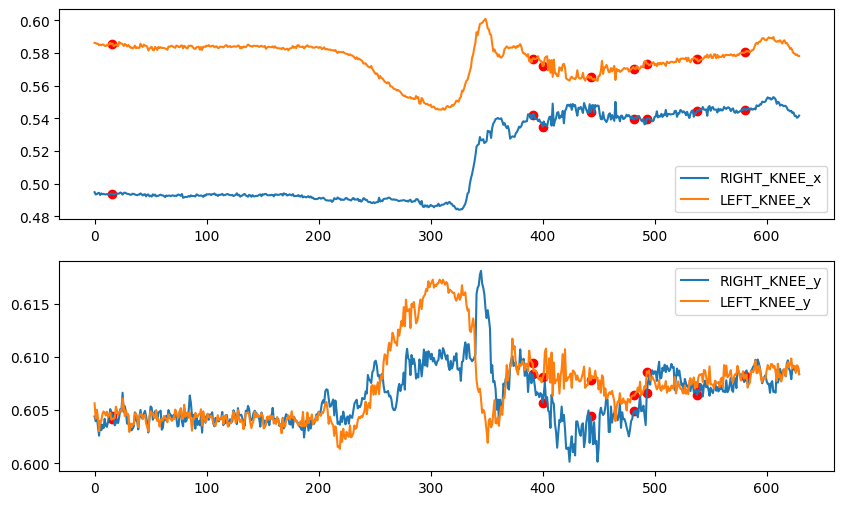

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(df.index, df['RIGHT_KNEE_x'], label='RIGHT_KNEE_x')
ax[0].scatter(df.iloc[anomaly_indices].index, df['RIGHT_KNEE_x'].iloc[anomaly_indices], c='r')
ax[0].plot(df.index, df['LEFT_KNEE_x'], label='LEFT_KNEE_x')
ax[0].scatter(df.iloc[anomaly_indices].index, df['LEFT_KNEE_x'].iloc[anomaly_indices], c='r')
ax[0].legend()

ax[1].plot(df.index, df['RIGHT_KNEE_y'], label='RIGHT_KNEE_y')
ax[1].scatter(df.iloc[anomaly_indices].index, df['RIGHT_KNEE_y'].iloc[anomaly_indices], c='r')
ax[1].plot(df.index, df['LEFT_KNEE_y'], label='LEFT_KNEE_y')
ax[1].scatter(df.iloc[anomaly_indices].index, df['LEFT_KNEE_y'].iloc[anomaly_indices], c='r')
ax[1].legend()

plt.show()